In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr


/var/folders/8w/zjcc1zn533s5xzkvtz1pfhl80000gn/T/ipykernel_76993/1933662026.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
# read in data
red = pd.read_csv('../data/wine+quality/winequality-red.csv', delimiter=';')
white = pd.read_csv('../data/wine+quality/winequality-white.csv', delimiter=';')


In [3]:
print(len(red))
print(len(white))

1599
4898


In [4]:
red['color'] = 'red'
white['color'] = 'white'
data = pd.concat([red, white])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## EDA

Fixed acidity in wine refers to the concentration of organic acids that do not evaporate readily and remain "fixed" during the process of fermentation and distillation. These include tartaric, malic, citric, and succinic acids, which are all naturally present in grapes and contribute to the overall taste and pH level of wine.

Volatile acidity (VA) in wine refers to the presence of organic acids that can evaporate, or become volatile, at room temperature. The primary acids contributing to volatile acidity are acetic acid and ethyl acetate.

Citric acid is one of the key organic acids found naturally in a variety of fruits, including grapes. In the context of wine, it's less prevalent than other acids like tartaric acid or malic acid but still plays a role in the overall acidity and taste profile of the wine. Citric acid adds to the crispness and freshness of the wine.

Residual sugar in wine refers to the amount of sugar left over after the fermentation process is complete. During fermentation, yeast consumes sugar and produces alcohol. If fermentation is stopped before all the sugar is consumed, or if more sugar is added after fermentation, the wine will have residual sugar and a sweeter taste.

Chlorides in wine, usually present in the form of sodium chloride (common table salt), are a natural component of grapes and an essential part of the winemaking process. They contribute to the overall balance of a wine and can affect the taste, helping to bring out the flavor profile of the wine.

Free sulfur dioxide (SO2) in wine refers to the amount of sulfur dioxide that is not bound to other molecules and is therefore free to act as a preservative.Sulfur dioxide has been used in winemaking for centuries due to its antioxidant and antibacterial properties. It can inhibit the growth of harmful bacteria and yeasts.

Total sulfur dioxide (SO2) in wine is the sum of the free and bound forms of sulfur dioxide.

Density in wine refers to the mass of the wine per unit of volume, which is influenced by its sugar content, alcohol content, and other dissolved solids. It is typically measured in grams per milliliter (g/mL).

Sulphates, or more accurately sulfites, in wine are compounds that contain the element sulfur. They are added to wine and many other food products as a preservative to prevent microbial growth and to inhibit oxidation, which can spoil the taste and color of the wine.

In [5]:
feat_ls = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [7]:
data_info = pd.DataFrame(data.describe())
data_info = data_info.apply(lambda v: v.round(3))
data_info.to_csv('data_info.csv')
data_info

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


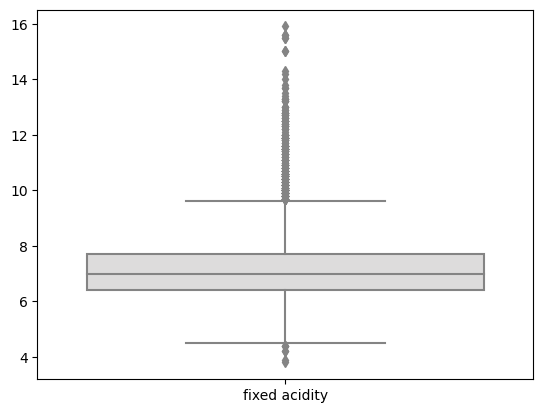

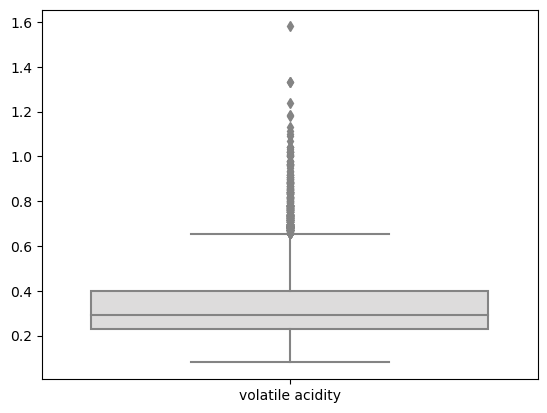

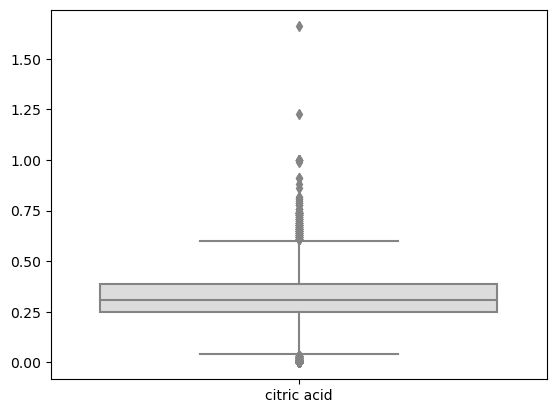

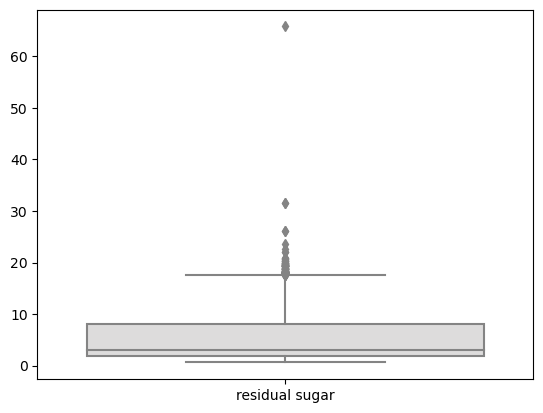

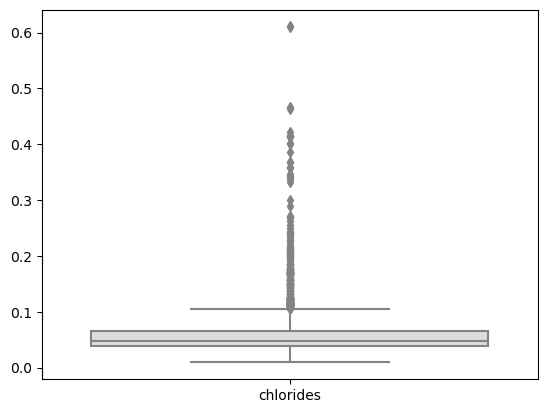

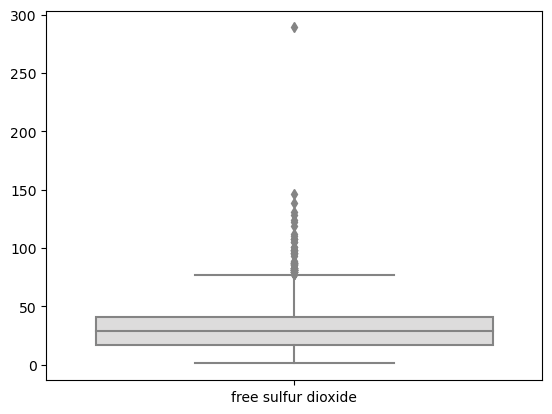

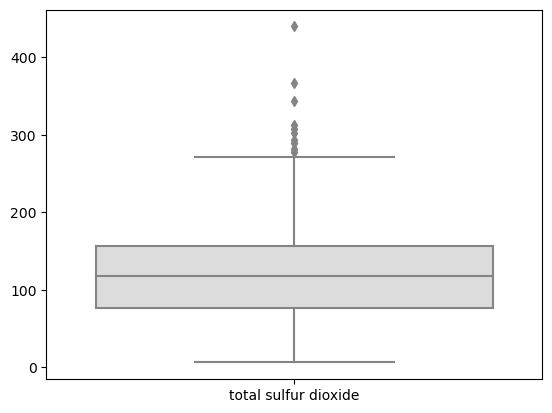

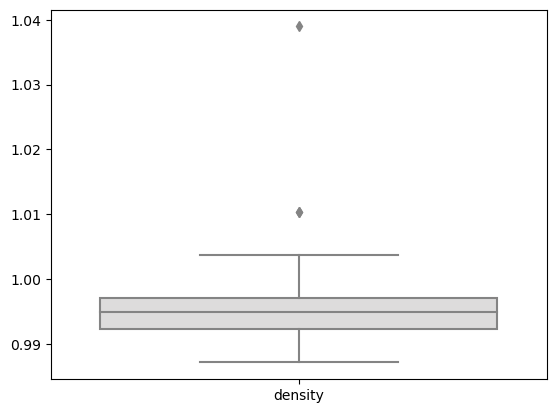

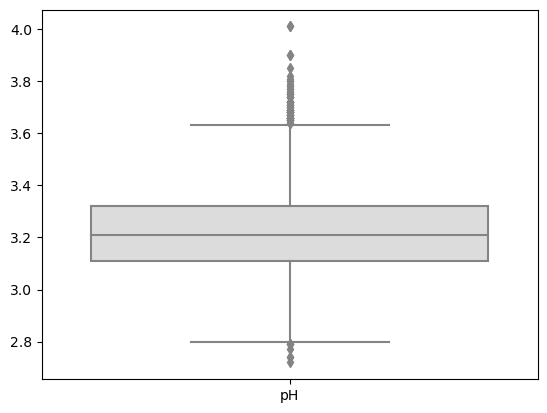

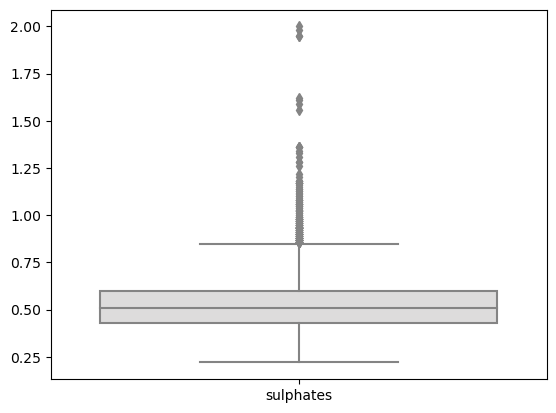

In [8]:
col_ls = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i, col in enumerate(col_ls):
    plt.figure(i)
    sns.boxplot(data=data[[col]], palette='coolwarm')
plt.close()

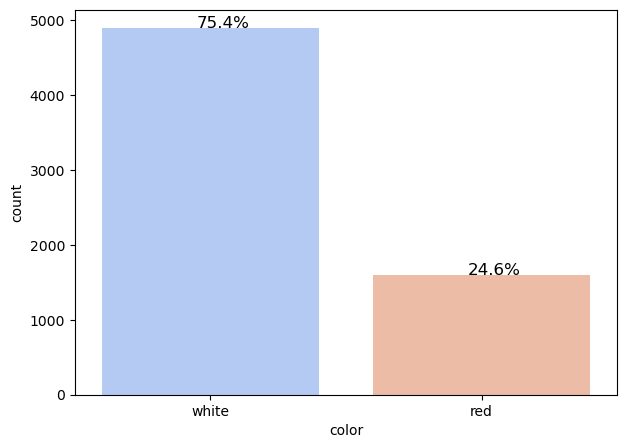

In [9]:
def add_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

data_tmp = data.iloc[::-1].copy() #cuz i want the white bar to be on the right side of the graph
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data_tmp["color"], palette='coolwarm')
add_percentage(ax, data_tmp["color"])

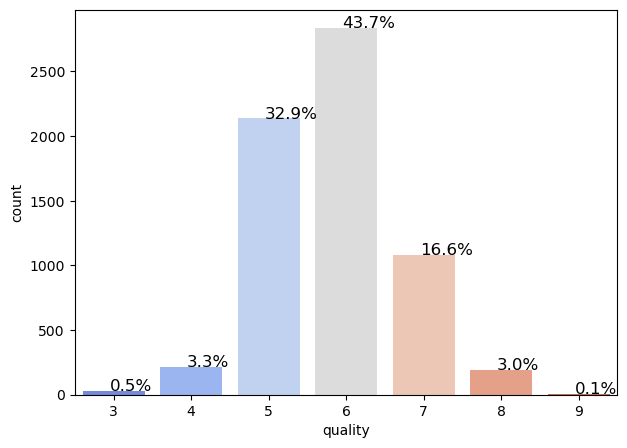

In [10]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["quality"], palette='coolwarm')
add_percentage(ax, data["color"])

group by quality, other features distribution

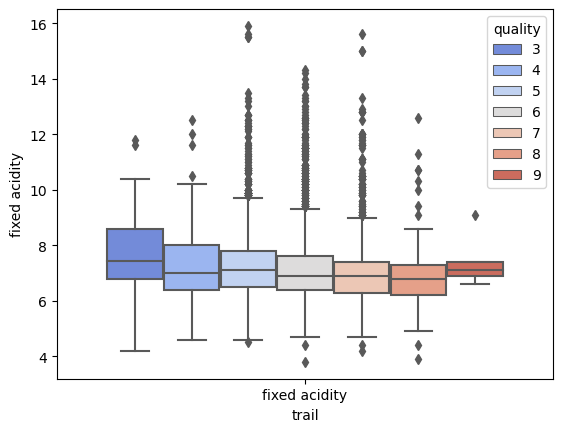

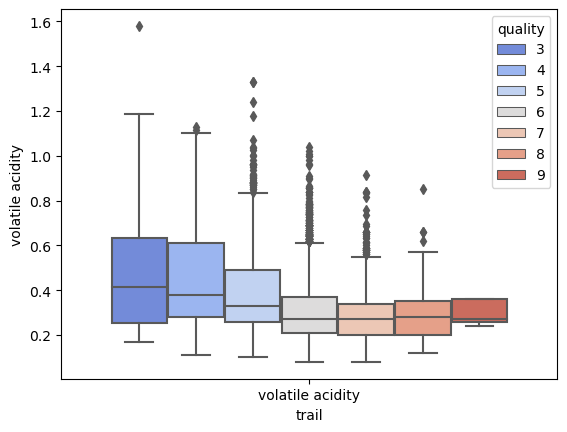

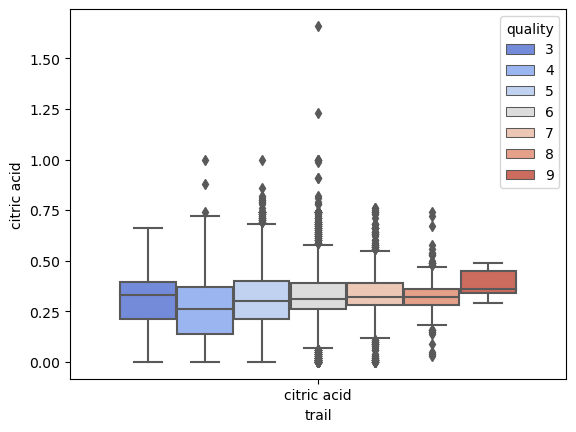

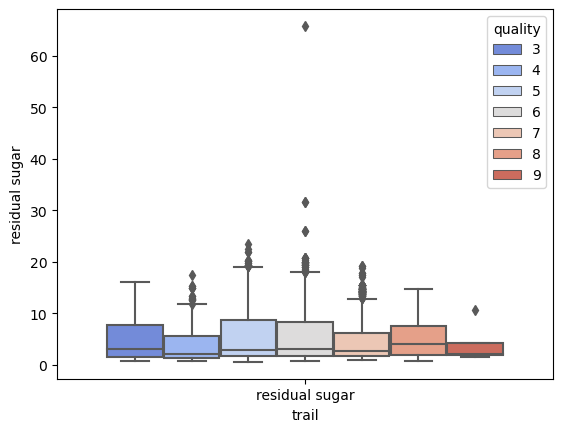

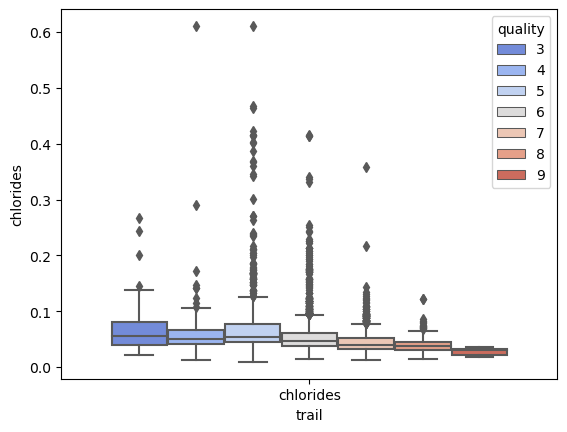

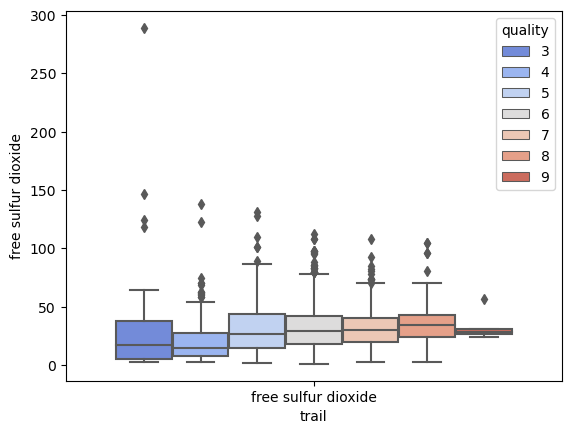

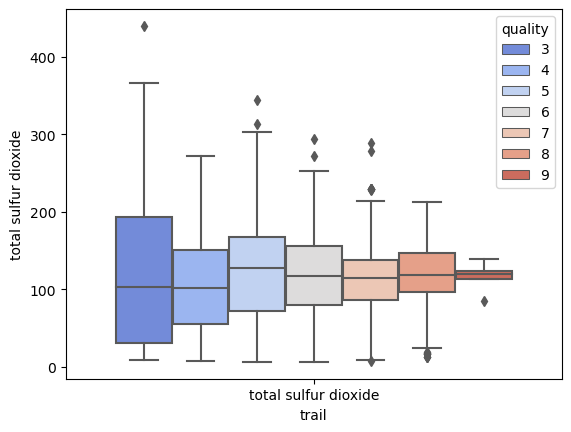

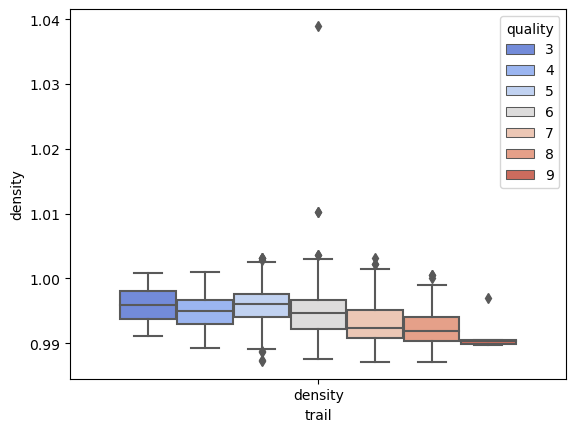

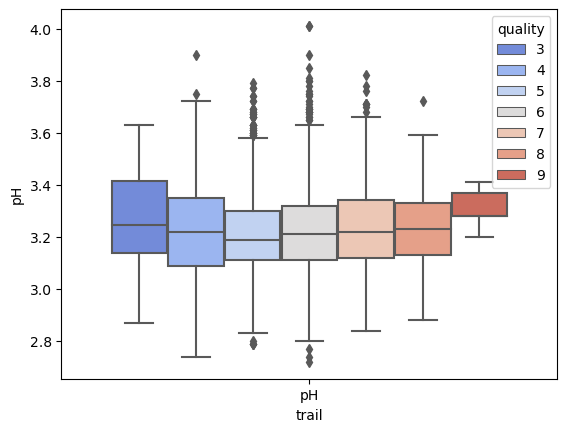

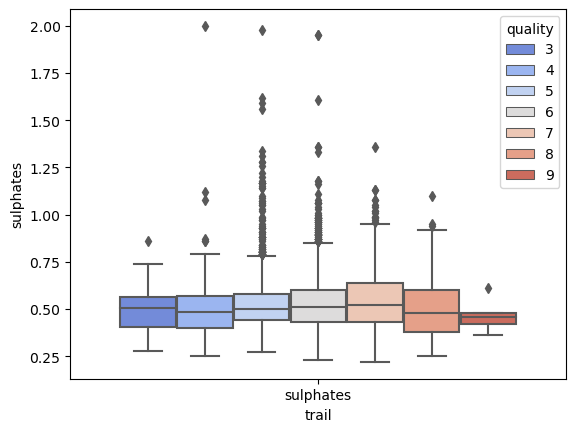

In [11]:
for ix, feat in enumerate(col_ls):
    data['trail'] = feat
    plt.figure(ix)
    sns.boxplot(x="trail", y=feat, hue='quality', data=data, palette='coolwarm')  # RUN PLOT   
plt.close()

## Outliers Detection

judgment call: keep outliers. GMM will detect outliers 

In [12]:
num_ls = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [13]:
for feat in num_ls:
    q1 = data[feat].quantile(0.25)
    q3 = data[feat].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    print(data[data[feat].apply(lambda v: v > ub or v<lb)][feat])
    print()

3       11.2
56      10.2
74       9.7
113     10.1
197     11.5
        ... 
4259     3.8
4446     4.4
4786     4.4
4787     3.9
4847     4.4
Name: fixed acidity, Length: 357, dtype: float64

0       0.700
1       0.880
2       0.760
4       0.700
5       0.660
        ...  
4650    0.695
4701    0.690
4702    0.690
4792    0.785
4815    0.760
Name: volatile acidity, Length: 377, dtype: float64

0       0.00
1       0.00
4       0.00
5       0.00
7       0.00
        ... 
4792    0.00
4808    0.67
4815    0.01
4877    0.00
4878    0.02
Name: citric acid, Length: 509, dtype: float64

0       20.70
7       20.70
14      19.25
38      17.95
39      17.95
        ...  
4691    19.25
4694    19.25
4748    18.35
4749    18.40
4778    19.40
Name: residual sugar, Length: 118, dtype: float64

13      0.114
14      0.176
15      0.170
17      0.368
19      0.341
        ...  
4793    0.175
4794    0.174
4813    0.127
4820    0.127
4845    0.136
Name: chlorides, Length: 286, dtype: float64

67  

## Feature Selection

Remove density and free sulfur dioxide

In [14]:
corr = data[feat_ls].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volatile acidity,0.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
citric acid,0.32,-0.38,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,-0.11,-0.20,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan
chlorides,0.30,0.38,0.04,-0.13,nan,nan,nan,nan,nan,nan,nan,nan
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,nan,nan,nan,nan,nan,nan,nan
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,nan,nan,nan,nan,nan,nan
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,nan,nan,nan,nan,nan
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,nan,nan,nan,nan
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,nan,nan,nan


In [15]:
feat_ls.remove('density')
feat_ls.remove('free sulfur dioxide')
feat_ls

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

# Is Six Cluster Correct?

### Silhouette score

white wine

In [16]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in tqdm(n_clusters):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(white[feat_ls])
        labels=gmm.predict(white[feat_ls])
        sil=metrics.silhouette_score(white[feat_ls], labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(tmp_sil)
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|█████████████████████████████████████████████| 8/8 [00:28<00:00,  3.53s/it]


Text(0, 0.5, 'Score')

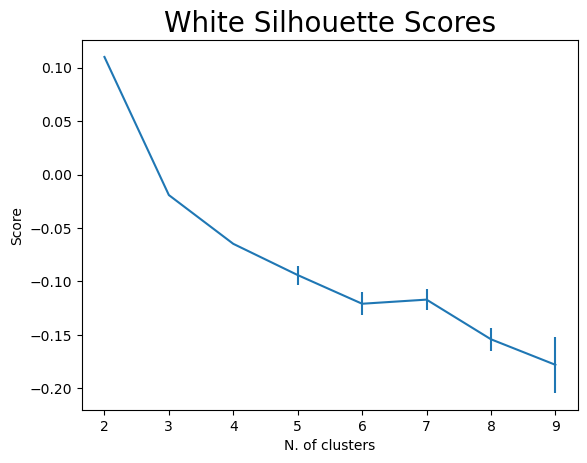

In [17]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("White Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

red wine

In [18]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in tqdm(n_clusters):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(red[feat_ls])
        labels=gmm.predict(red[feat_ls])
        sil=metrics.silhouette_score(red[feat_ls], labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(tmp_sil)
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|█████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Text(0, 0.5, 'Score')

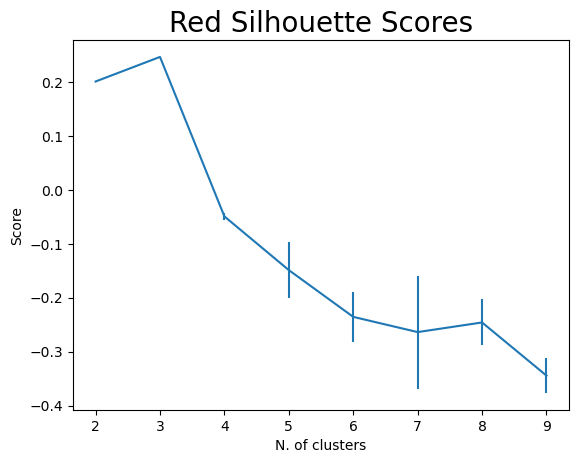

In [19]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Red Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

red + white wine

In [23]:
white['color_code'] = 1
red['color_code'] = 0
data = pd.concat([white, red])

In [21]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in tqdm(n_clusters):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(data[feat_ls+['color_code']]) #n_init=2
        labels=gmm.predict(data[feat_ls+['color_code']])
        sil=metrics.silhouette_score(data[feat_ls+['color_code']], labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(tmp_sil)
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|█████████████████████████████████████████████| 8/8 [00:40<00:00,  5.06s/it]


Text(0, 0.5, 'Score')

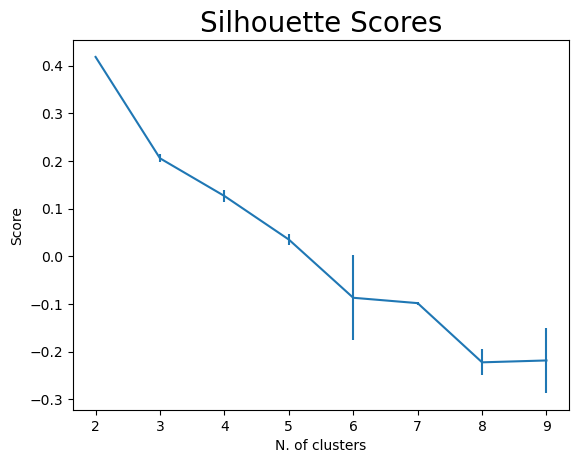

In [24]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

## GMM distance

In [25]:
#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [36]:
def train_two_gmm_get_dist(data, max_cluster=10, iterations=5):
    results=[]
    res_sigs=[]
    for n in tqdm(np.arange(2, max_cluster)):
        dist=[]
        for iteration in range(iterations):
            train, test=train_test_split(data[feat_ls], test_size=0.5)
        
            gmm_train=GMM(n, n_init=2).fit(train) 
            gmm_test=GMM(n, n_init=2).fit(test) 
            dist.append(gmm_js(gmm_train, gmm_test))

        result=np.mean(dist)
        res_sig=np.std(dist)
        results.append(result)
        res_sigs.append(res_sig)
    return results, res_sigs
#--train_two_gmm_get_dist

Red Wine -- suggest two clusters

  0%|                                                     | 0/8 [00:00<?, ?it/s]/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature name

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

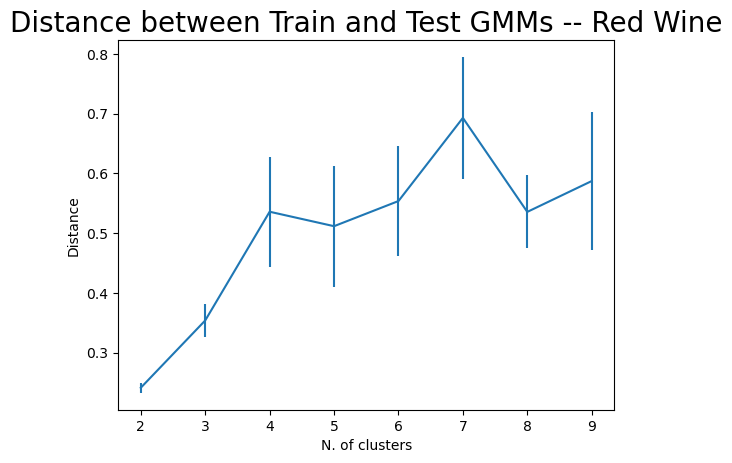

In [37]:
max_cluster = 10
r_d, r_d_sigs = train_two_gmm_get_dist(red, max_cluster=max_cluster, iterations=5)

plt.errorbar(np.arange(2, max_cluster), r_d, yerr=r_d_sigs)
plt.title("Distance between Train and Test GMMs -- Red Wine", fontsize=20)
plt.xticks(np.arange(2, max_cluster))
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()    

White Wine -- suggest two clusters

  0%|                                                     | 0/8 [00:00<?, ?it/s]/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature name

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/shu

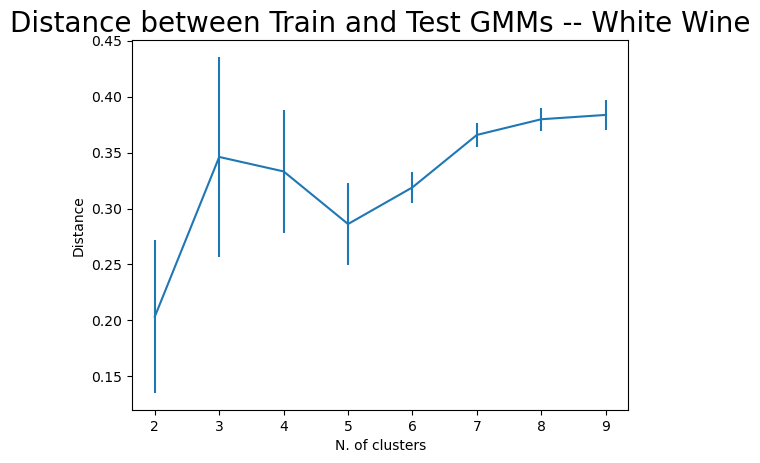

In [38]:
max_cluster = 10
w_d, w_d_sigs = train_two_gmm_get_dist(white, max_cluster=max_cluster, iterations=5)

plt.errorbar(np.arange(2, max_cluster), w_d, yerr=w_d_sigs)
plt.title("Distance between Train and Test GMMs -- White Wine", fontsize=20)
plt.xticks(np.arange(2, max_cluster))
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()    

All Data -- suggest two clusters

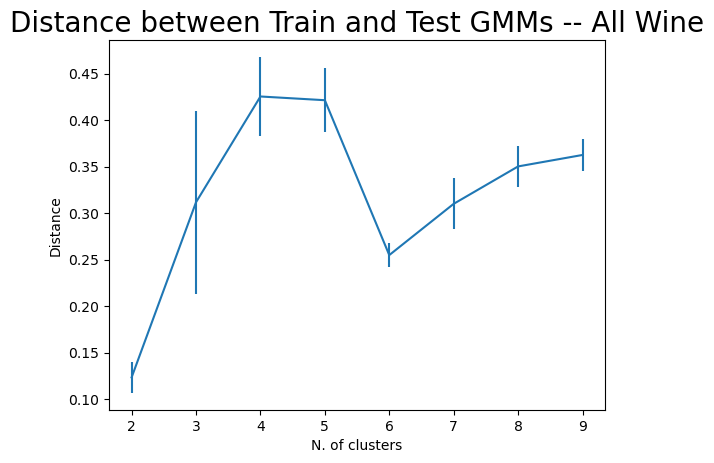

In [40]:
max_cluster = 10
all_d, all_d_sigs = train_two_gmm_get_dist(data, max_cluster=max_cluster, iterations=5)

plt.errorbar(np.arange(2, max_cluster), all_d, yerr=all_d_sigs)
plt.title("Distance between Train and Test GMMs -- All Wine", fontsize=20)
plt.xticks(np.arange(2, max_cluster))
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()    

## BIC

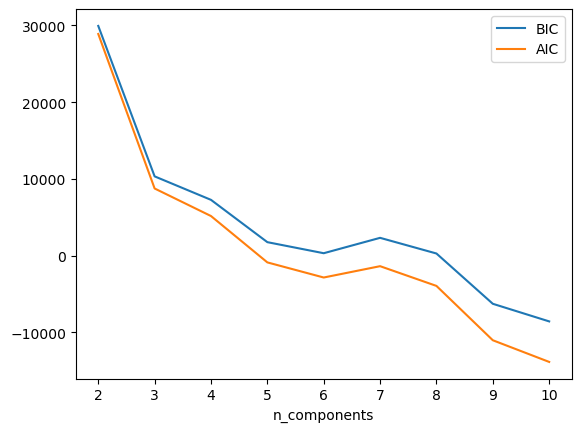

In [166]:
n_components = np.arange(2, 11)
models = [GMM(n, covariance_type='full', random_state=0).fit(data[feat_ls+['color']])
          for n in n_components]
plt.plot(n_components, [m.bic(data[feat_ls+['color']]) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data[feat_ls+['color']]) for m in models], label='AIC')
plt.xticks(np.arange(2, 11, 1))
plt.legend(loc='best')
plt.xlabel('n_components');

## BIC Gradient

In [167]:
n_clusters=np.arange(2, 10)
bics=[]
bics_err=[]
iterations=5
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(data[feat_ls+['color']]) 
        tmp_bic.append(gmm.bic(data[feat_ls+['color']]))
    
    val = np.mean(tmp_bic)
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)


100%|█████████████████████████████████████████████| 8/8 [00:24<00:00,  3.05s/it]


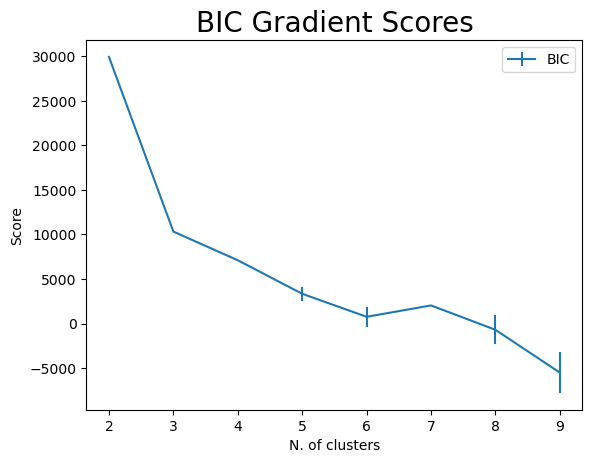

In [168]:
plt.errorbar(n_clusters, bics, yerr=bics_err, label='BIC')
plt.title("BIC Gradient Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

# Modeling: GMM red 3 clusters, white 2 clusters

In [19]:
white_cluster_change = {0: 3, 1: 4}

In [21]:
gmm_white = GMM(n_components=2, random_state=314).fit(white[feat_ls])
white['cluster'] = gmm_white.predict(white[feat_ls])
white['cluster'] = white.cluster.apply(lambda v: white_cluster_change.get(v))
white['cluster_prob'] = gmm_white.predict_proba(white[feat_ls])


In [22]:
print(red['cluster'].value_counts())
print(red['cluster'].value_counts(normalize=True))

0    1190
1     223
2     186
Name: cluster, dtype: int64
0    0.744215
1    0.139462
2    0.116323
Name: cluster, dtype: float64


In [23]:
print(white['cluster'].value_counts())
print(white['cluster'].value_counts(normalize=True))

4    4085
3     813
Name: cluster, dtype: int64
4    0.834014
3    0.165986
Name: cluster, dtype: float64


In [24]:
data = pd.concat([red, white])

Text(0.5, 1.0, 'Red Wine Cluster')

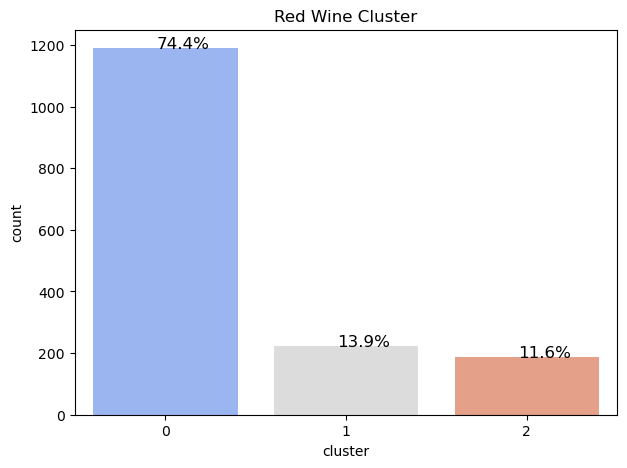

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=red["cluster"], palette='coolwarm')
add_percentage(ax, red["cluster"])
plt.title('Red Wine Cluster')

Text(0.5, 1.0, 'White Wine Cluster')

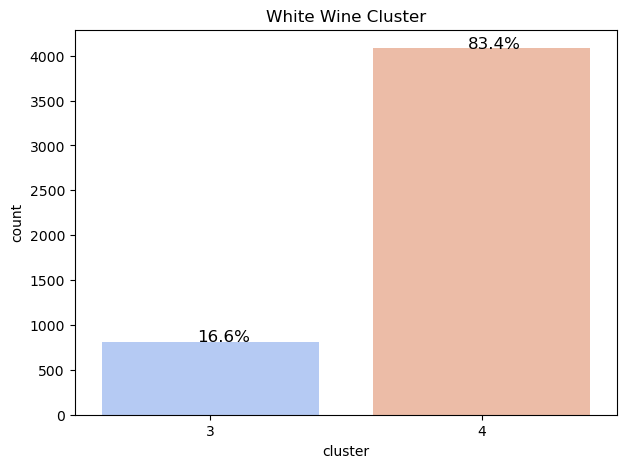

In [26]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=white["cluster"], palette='coolwarm')
add_percentage(ax, white["cluster"])
plt.title('White Wine Cluster')

In [30]:
gm_explain_df1 = pd.DataFrame(gmm_red.means_).T
gm_explain_df1.index = gmm_red.feature_names_in_
gm_explain_df1.columns = [f'cluster_{c}' for c in gm_explain_df1.columns]
gm_explain_df1 = gm_explain_df1.apply(lambda v: round(v, 3))


gm_explain_df2 = pd.DataFrame(gmm_white.means_).T
gm_explain_df2.index = gmm_white.feature_names_in_
gm_explain_df2.columns = [f'cluster_{white_cluster_change.get(c)}' for c in gm_explain_df2.columns]
gm_explain_df2 = gm_explain_df2.apply(lambda v: round(v, 3))

gm_explain_df = gm_explain_df1.join(gm_explain_df2)
gm_explain_df.to_csv('gm_explain_df.csv')
gm_explain_df

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
fixed acidity,8.329,7.770,8.897,6.776,6.872
volatile acidity,0.510,0.583,0.565,0.351,0.262
citric acid,0.258,0.265,0.349,0.403,0.319
residual sugar,2.165,4.440,2.475,8.093,6.011
chlorides,0.078,0.083,0.146,0.065,0.041
total sulfur dioxide,38.136,61.958,75.990,158.026,133.962
pH,3.324,3.332,3.216,3.140,3.199
sulphates,0.639,0.702,0.715,0.479,0.492
alcohol,10.412,10.951,9.879,9.506,10.740
quality,5.702,5.657,5.236,5.281,6.012


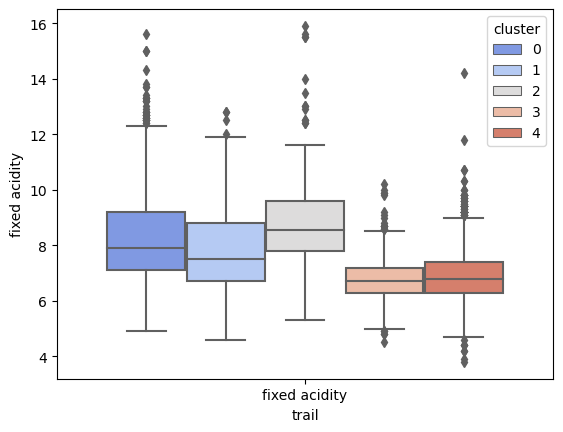

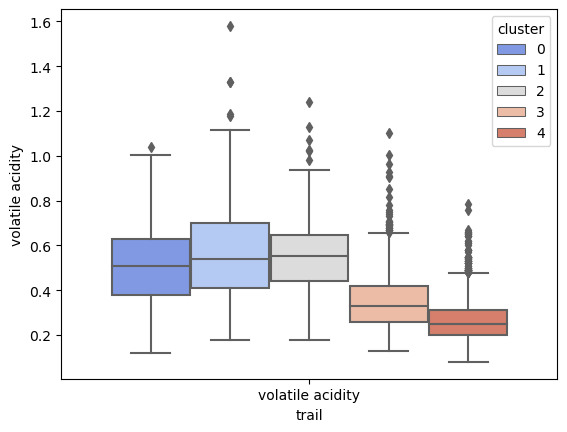

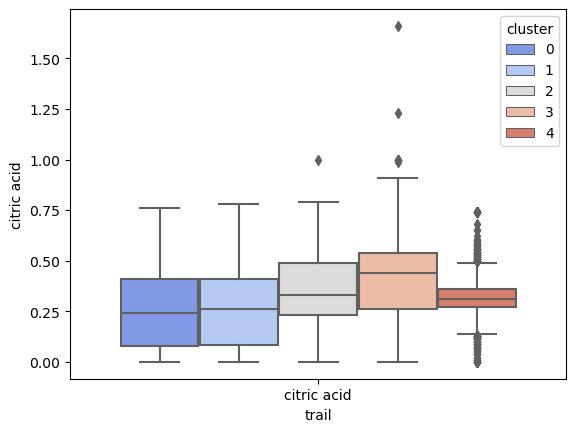

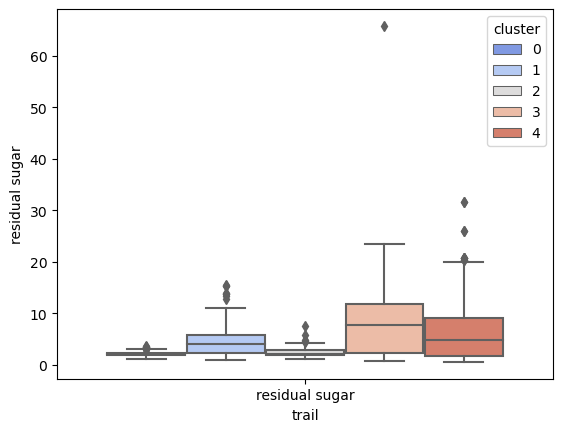

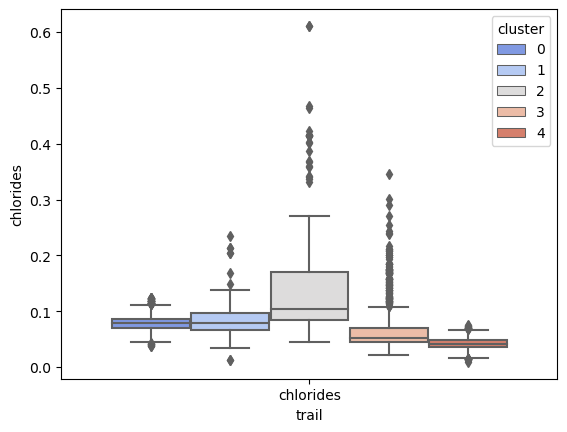

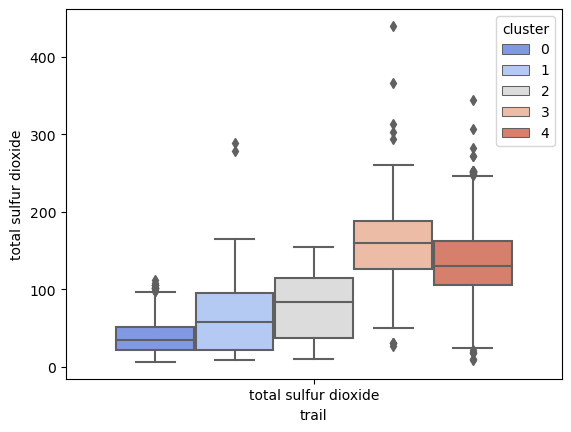

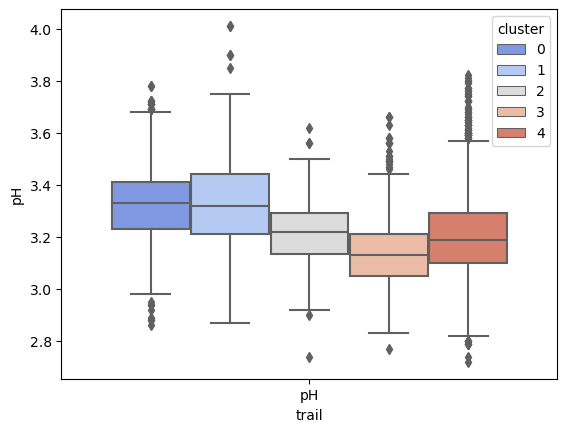

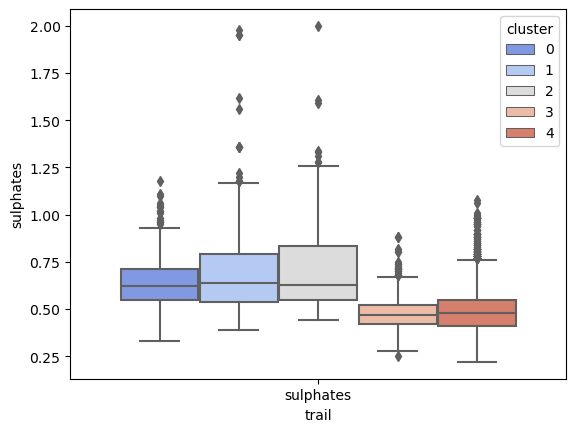

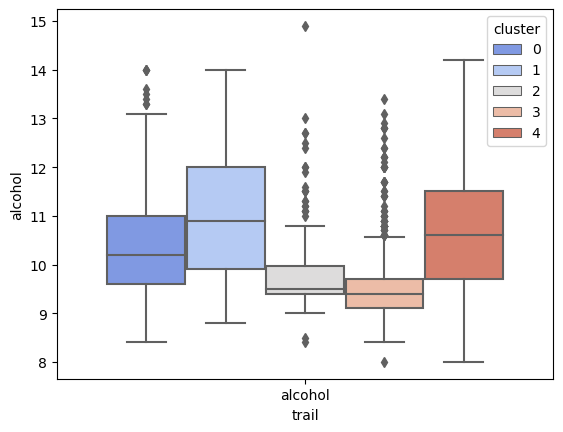

In [31]:
for ix, feat in enumerate(feat_ls):
    data['trail'] = feat
    plt.figure(ix)
    sns.boxplot(x="trail", y=feat, hue='cluster', data=data, palette='coolwarm')  # RUN PLOT   
plt.close()

In [175]:
data.cluster3.value_counts(normalize=True)

0    0.737263
1    0.262737
Name: cluster3, dtype: float64

In [176]:
data.groupby('color').cluster3.value_counts(normalize=True)

color  cluster3
0      1           1.00000
1      0           0.97795
       1           0.02205
Name: cluster3, dtype: float64

In [36]:
quality_cluster_df = pd.DataFrame(data.groupby('cluster').quality.value_counts(normalize=True))
quality_cluster_df.columns = ['pct']
quality_cluster_df.reset_index(inplace=True)
quality_cluster_df

,cluster,quality,pct
0,0,6,0.443697
1,0,5,0.389076
2,0,7,0.127731
3,0,4,0.026891
4,0,8,0.010924
5,0,3,0.001681
6,1,5,0.385650
7,1,6,0.304933
8,1,7,0.192825
9,1,4,0.071749


Text(0.5, 1.0, 'Cluster Quality Percentage')

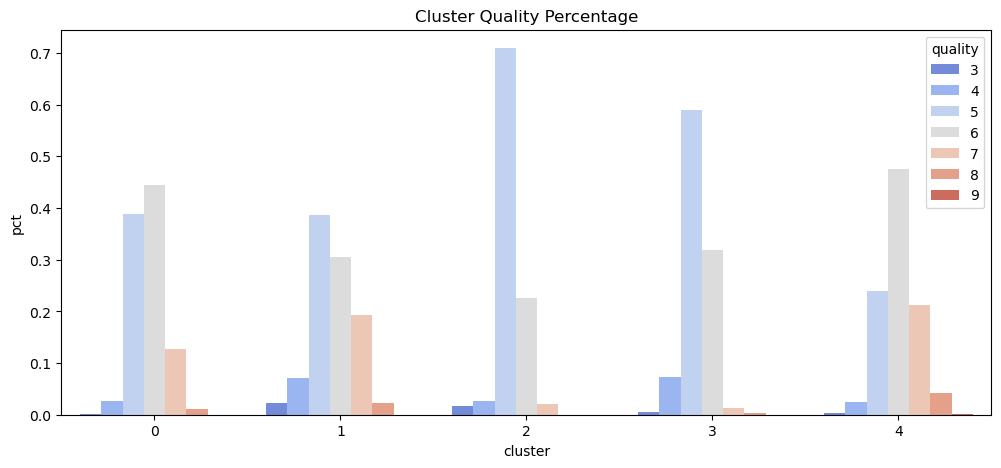

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(data=quality_cluster_df, x="cluster", y= 'pct', hue='quality', palette='coolwarm')
plt.legend(loc='upper right', title='quality')
plt.title('Cluster Quality Percentage')

## wine from multiple clusters

In [ ]:
def calculate_prob_diff(prob_ls):
    
    prob_ls.sort()
    return prob_ls[-1] - prob_ls[-2]

pred_prob_red = gmm_red.predict_proba(red[feat_ls])
red['cluster_0'] = [c[0] for c in pred_prob_red]
red['cluster_1'] = [c[1] for c in pred_prob_red]
red['cluster_2'] = [c[2] for c in pred_prob_red]

red['prob_diff'] = red[['cluster_0', 'cluster_1', 'cluster_2']].apply(lambda v: calculate_prob_diff(list(v)), axis=1)


red.sort_values(by='prob_diff', ascending=True, inplace=True)
red[:3].to_csv('red_multiple_sources_example.csv', index = False)

pred_prob_w = gmm_white.predict_proba(white[feat_ls])
white['cluster_3'] = [c[0] for c in pred_prob_w]
white['cluster_4'] = [c[1] for c in pred_prob_w]

white['prob_diff'] = white[['cluster_3', 'cluster_4']].apply(lambda v: calculate_prob_diff(list(v)), axis=1)


white.sort_values(by='prob_diff', ascending=True, inplace=True)
white[:3].to_csv('white_multiple_sources_example.csv', index = False)


k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data!

Now, consider the following example where the distribution of points is not in a circular form. What do you think will happen if we use k-means clustering on this data? It would still attempt to group the data points in a circular fashion.

By eye, we recognize that these transformed clusters are noncircular, and thus circular clusters would be a poor fit. 
Nevertheless, k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap: see especially the bottom-right of this plot. One might imagine addressing this particular situation by preprocessing the data with PCA (see In Depth: Principal Component Analysis), but in practice there is no guarantee that such a global operation will circularize the individual groups.


# Compare GMM with K-means

In [110]:
def construct_cluster_compare(gnn, kmeans, groupby='gmm'):
    kmeans.rename(columns={'cluster': "cluster_kmeans"}, inplace=True)
    gnn.rename(columns={'cluster': 'cluster_gmm'}, inplace=True)
    cluster_compare = gnn.join(kmeans[['cluster_kmeans']])
    
    if groupby=='gmm':
        model_comp_df = pd.DataFrame(cluster_compare.groupby('cluster_gmm').cluster_kmeans.value_counts(normalize=True))
        model_comp_df.columns = ['pct']
        model_comp_df.reset_index(inplace=True)
    else:
        model_comp_df = pd.DataFrame(cluster_compare.groupby('cluster_kmeans').cluster_gmm.value_counts(normalize=True))
        model_comp_df.columns = ['pct']
        model_comp_df.reset_index(inplace=True)
        
    return model_comp_df


In [102]:
kmeans_pred = pd.read_csv('red_pca_kmeans_pred.csv')

In [112]:
red_cluster = construct_cluster_compare(red, kmeans_pred, groupby='kmeans')
red_cluster

,cluster_kmeans,cluster_gmm,pct
0,0,0,0.725424
1,0,2,0.144068
2,0,1,0.130508
3,1,0,0.755203
4,1,1,0.144698
5,1,2,0.100099


Text(0.5, 1.0, 'GMM clusters breakdown by Kmeans clusters')

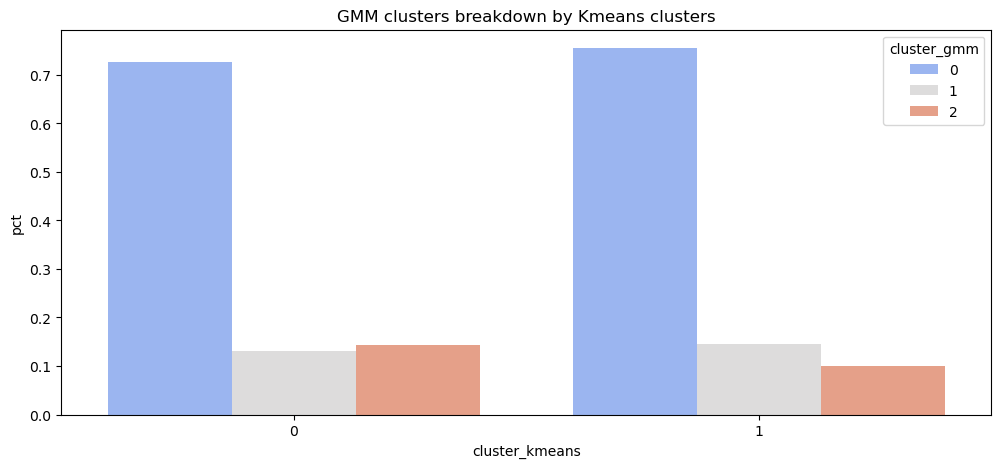

In [113]:
plt.figure(figsize=(12,5))
sns.barplot(data=red_cluster, x="cluster_kmeans", y= 'pct', hue='cluster_gmm', palette='coolwarm')
plt.legend(loc='upper right', title='cluster_gmm')
plt.title('GMM clusters breakdown by Kmeans clusters')

In [100]:
cluster_kmeans 0, 1--> red, 2, 3 --> white
cluster_gmm.   0, 1, 2 -->red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,cluster,trail
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0,quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,4,quality
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,4,quality
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,4,quality
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,4,quality


In [99]:
data_compare[data_compare.cluster_gmm==3][data_compare.cluster_kmeans==0]

/var/folders/8w/zjcc1zn533s5xzkvtz1pfhl80000gn/T/ipykernel_73799/115473025.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_compare[data_compare.cluster_gmm==3][data_compare.cluster_kmeans==0]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,cluster_gmm,trail,cluster_kmeans
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,white,3,quality,1
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.8,5,white,3,quality,1
65,6.2,0.35,0.03,1.2,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5,white,3,quality,1
70,6.2,0.27,0.43,7.8,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6,white,3,quality,1
85,7.1,0.44,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,6,white,3,quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,6.5,0.21,0.51,17.6,0.045,34.0,125.0,0.99966,3.20,0.47,8.8,6,white,3,quality,2
3700,7.0,0.30,0.27,1.5,0.076,24.0,145.0,0.99344,3.10,0.52,10.1,5,white,3,quality,3
3708,7.7,0.35,0.46,11.8,0.088,61.0,183.0,0.99786,2.86,0.47,9.0,5,white,3,quality,2
3719,6.6,0.30,0.45,8.0,0.038,54.0,200.0,0.99560,3.18,0.48,9.5,5,white,3,quality,2


Text(0.5, 1.0, 'GMM clusters breakdown by Kmeans clusters')

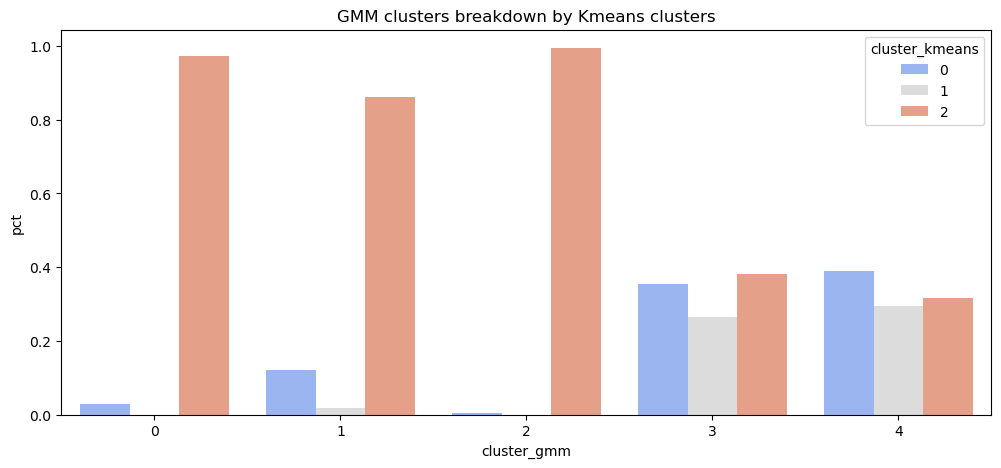

In [94]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_comp_df, x="cluster_gmm", y= 'pct', hue='cluster_kmeans', palette='coolwarm')
plt.legend(loc='upper right', title='cluster_kmeans')
plt.title('GMM clusters breakdown by Kmeans clusters')